# Local Reputation for Peer/Channel scoring Analysis

This Jupyter notebook contains an exploratory analysis of the [Local Reputation for Peer/Channel scoring RFC](https://github.com/LNOpenMetrics/lnmetrics.rfc/blob/main/metrics/metric_1.md).

## Table of Contents

- Introduction: An introduction to lnmetrics
- RFC Introduction: An Introduction to the Local Reputation for Peer/Channel scoring
- Metrics Analysis: A general analysis of the metric

In [1]:
%matplotlib inline
from src import ChartMaker

maker = ChartMaker()

## Introduction

The **lnmetrics** project aims to develop a collection of tools for running Lightning Network nodes with daily activity. 
This project involves defining and collecting Lightning Network metrics through a data-driven analysis.

### Problem

Obtaining information on how a node performs on a daily basis is difficult due to two primary reasons. 
- First, it requires a direct interaction with node operators, who may not be willing to share their data due to privacy concerns. 
- Second, data collection of this kind can leak private data, and node operators do not want to be exposed to this risk.

### Proposed Solution

To work around these problems, our proposal defines what data will be collected and how it will 
be analyzed in a public manner through a lnmetrics **Request for Comments (RFC)**, called lnmetrics RFC. Once the data is defined, 
it is collected using a public server with a public API, with the possibility to self-host the server on hardware with at 
least a Raspberry PI 2 capability.

We conducted an analysis of the state of the art, which helped us better understand which information is difficult to obtain 
from a researcher’s point of view. Our preliminary study revealed that information on how a node performs on a daily basis is 
difficult to obtain. We then developed an open-source framework for defining and collecting these metrics. 

This framework enables us to collect the data in a public and non-invasive manner.

## Metrics Analysis

### Introduction

The first step we took was to design our data model by analyzing the data we obtained from the core lightning node. The first version of our data model is available on Github at [the following link1(https://raw.githubusercontent.com/LNOpenMetrics/lnmetrics.rfc/main/schemas/metric_1_input.schema.json). The data is divided into two main parts, as follows:

1. Lightning Node performance information: The performance of the node that is running the metrics, including:
   - Operating System information;
   - The number of channels of the node;
   - The number of forwards payments that the node has performed in the last 30 minutes;
   - The current lightning fee that the node has to forward a payment.

2. Performance for each channel:
   - If the node is online at the moment of the check;
   - The current lightning fee of the channel to forward a payment through it;
   - The number of payments that are forwarded in the last 30 minutes through this specific channel;
   - The channel direction, where for each lightning channel there will be two items: one of inbound connection, and another one for outbound connection. In this way, it is possible to try to estimate the usable direction of the channel.

When the client provides the data to the analysis system, the following metric output is calculated: 

- Lightning node up time scoring divided by period is calculated; 
- Lightning channel forwards payment scoring divided in success, failure, and local failure is calculated, where the local failure is how many forwards are failing because of some lightning node problem, e.g., the node that is running the metrics has no channel with enough outbound capacity.
- For each channel the previous information is calculated for this particular channel.

A more detailed description of the metric output is provided on Github as RFC with the schema of the data just described. We avoid reporting the full code example due to the size of the schema.

In the following sections an analysis of the metric calculated is done by quering the API.

### Node Uptimes

In this section there is an analysis of the nodes up time available on the server
divided by network!

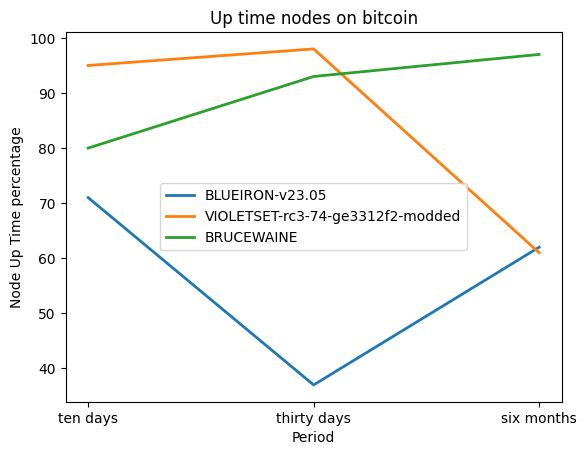

In [2]:
maker.show_uptime_nodes("bitcoin")

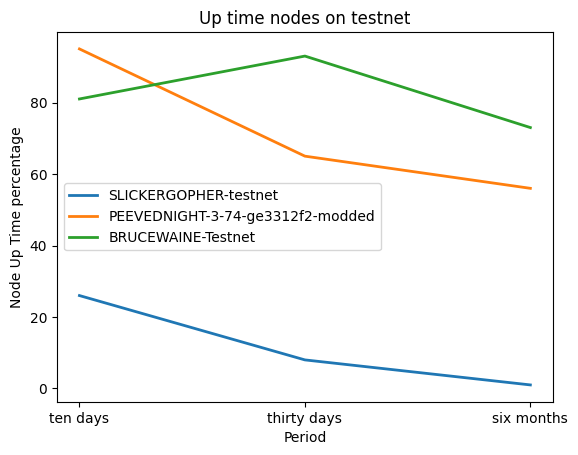

In [3]:
maker.show_uptime_nodes("testnet")

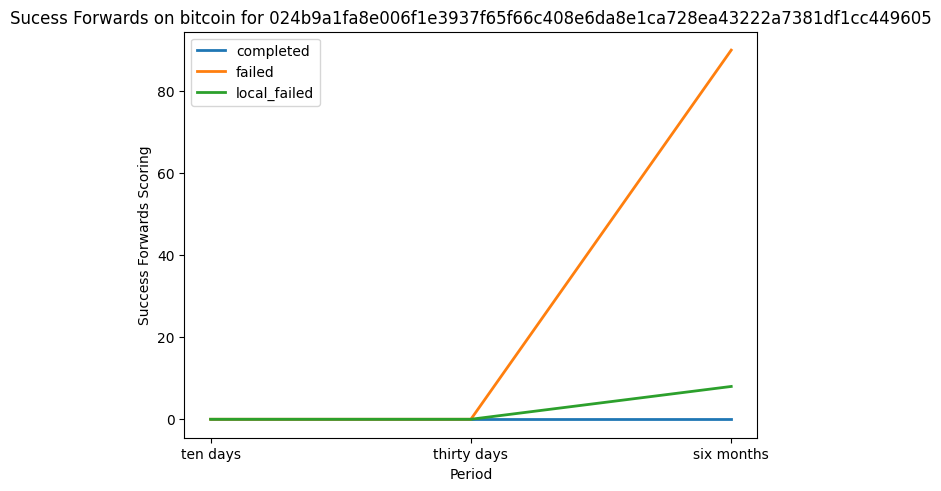

In [4]:
maker.show_forwards_activity_node("bitcoin", "024b9a1fa8e006f1e3937f65f66c408e6da8e1ca728ea43222a7381df1cc449605")

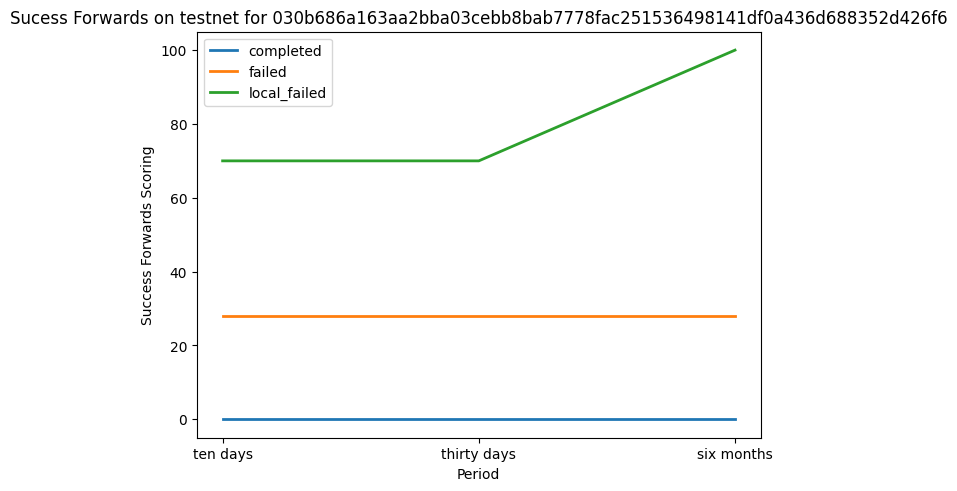

In [5]:
maker.show_forwards_activity_node("testnet", "030b686a163aa2bba03cebb8bab7778fac251536498141df0a436d688352d426f6")

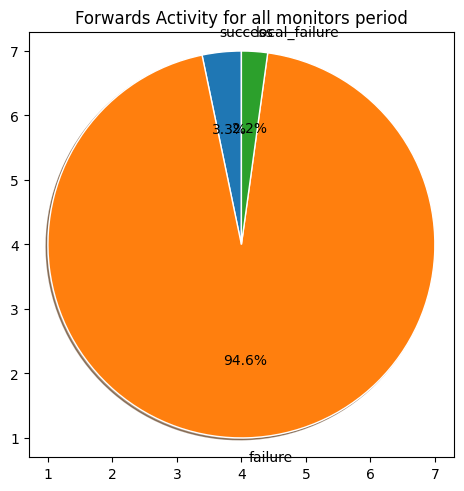

In [6]:
maker.show_forwards_activity_node_for_all_period("bitcoin", "024b9a1fa8e006f1e3937f65f66c408e6da8e1ca728ea43222a7381df1cc449605")

## Network activity by network

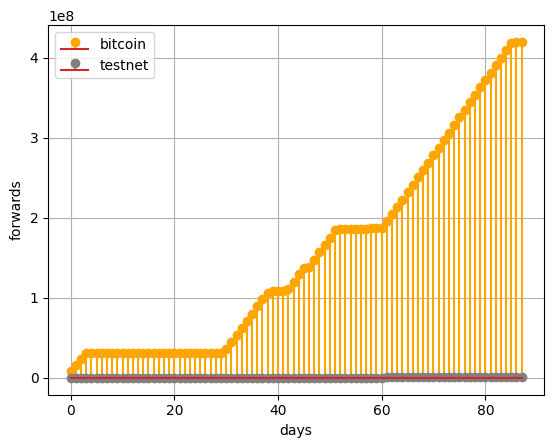

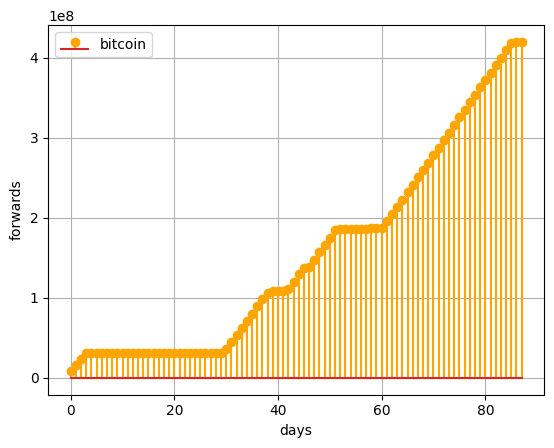

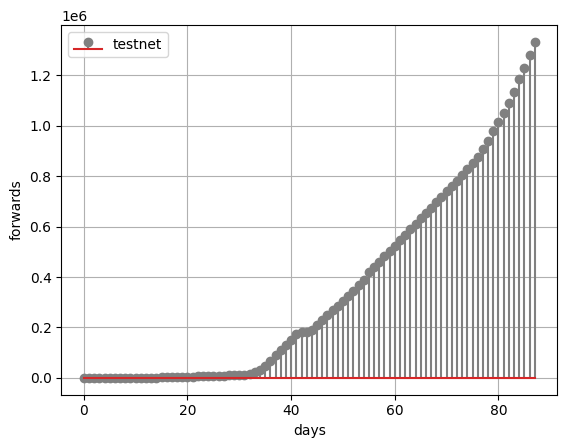

In [7]:
bitcoin_forwards_activity = maker.count_forwards_in_period("bitcoin", 
                                                           "024b9a1fa8e006f1e3937f65f66c408e6da8e1ca728ea43222a7381df1cc449605", 
                                                           '1/1/2023', '30/3/2023')
testnet_forwards_activity = maker.count_forwards_in_period("testnet", 
                                                           "030b686a163aa2bba03cebb8bab7778fac251536498141df0a436d688352d426f6", 
                                                           '1/1/2023', '30/3/2023')
maker.show_activity_node_by_network({"bitcoin": bitcoin_forwards_activity, "testnet": testnet_forwards_activity})
maker.show_activity_node_by_network({"bitcoin": bitcoin_forwards_activity})
maker.show_activity_node_by_network({"testnet": testnet_forwards_activity})

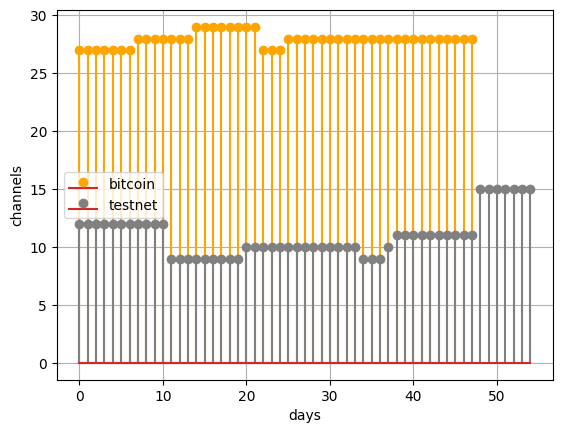

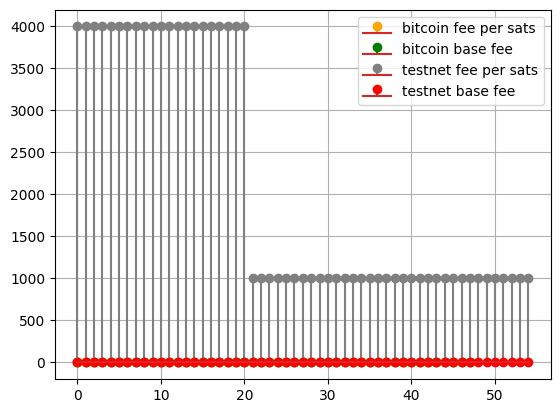

In [8]:
bitcoin_node_size = maker.count_node_size_by_period("bitcoin",
                                                   "024b9a1fa8e006f1e3937f65f66c408e6da8e1ca728ea43222a7381df1cc449605",         
                                                   '1/1/2023', '31/3/2023')
testnet_node_size = maker.count_node_size_by_period("testnet", 
                                                    "030b686a163aa2bba03cebb8bab7778fac251536498141df0a436d688352d426f6",         
                                                   '1/2/2023', '31/3/2023')
maker.show_size_node_by_network({"bitcoin": bitcoin_node_size, "testnet": testnet_node_size})
maker.show_node_fee_by_network({"bitcoin": bitcoin_node_size, "testnet": testnet_node_size})

## Reproducer Considerations

**N.B: This is unrealted to the RFC discussion**

At this point, we evaluate the data that we have provided and compare it with the data provided by the peer.

In this section, we will consider the technical requirements to run this reproducer for our evaluation.

### Space Required by the Server

The server has been running since Jan 01 2022 to support the testing of the software that we were providing. Additionally, in the last 3 months, we deployed another server on a local Raspberry Pi 4. A comparison of the space needed by both databases is shown below:

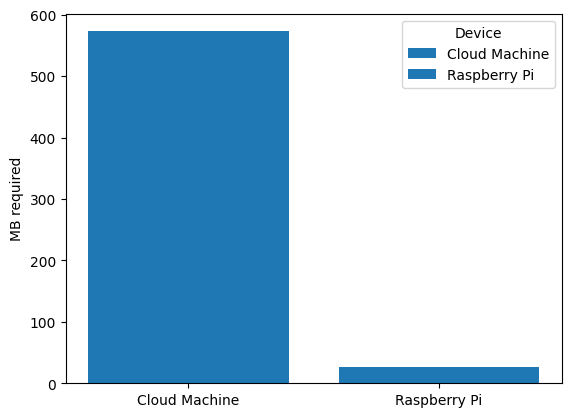

In [9]:
maker.show_simple_bar_chart("Server Database Comparison", 'Device', ["Cloud Machine", "Raspberry Pi"], [573, 27], 'MB required')

As the figure shows, for one year of data, the cloud machine used only 573 Mb, while the Raspberry Pi, used for the last 3 months, used only 27 Mb. The server is hosting information for each network on a general basis, and an overview of the quantity of node information is provided below:

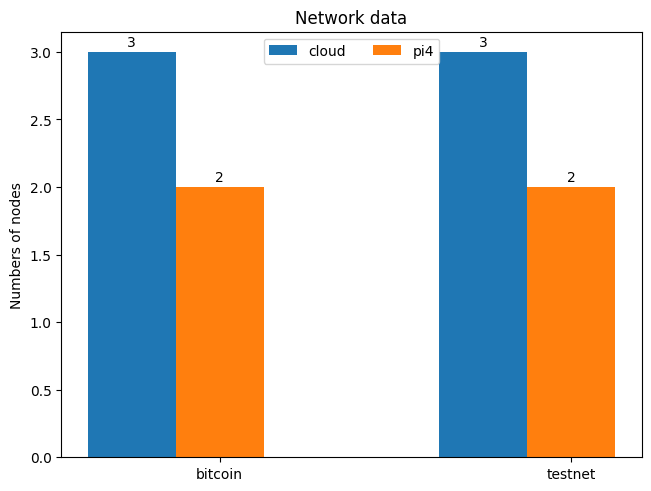

In [10]:
maker.show_server_comparison_char({"cloud": "https://api.lnmetrics.info/query", "pi4": "https://lnmetrics.lndart.dev/query"}, ['bitcoin', 'testnet'])

## Appendinx

In this appending we will provide some analysis of the tools that we use in order to use implement the reference implementation https://github.com/LNOpenMetrics/go-lnmetrics.reporter for core lightning.

**N.B: This is unrealted to the RFC discussion**

### cln4go comparison with glightning

In this final section, we will analyze the performance improvements we achieved with the cln4go tool compared to the well-known glightning library, which uses pure Go reflection to encode and decode JSON to and from a Go struct.

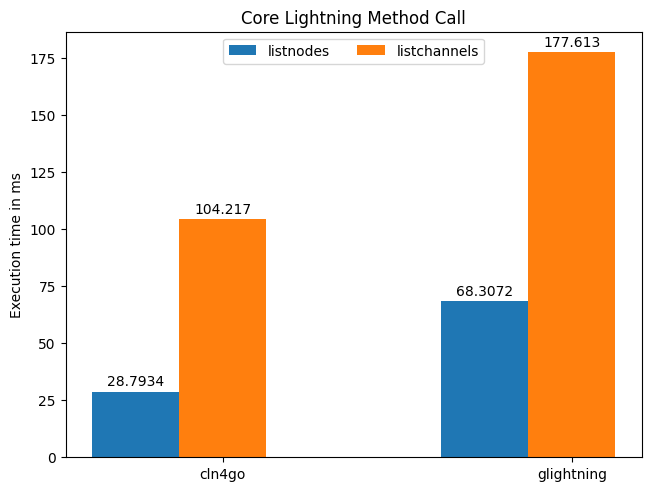

In [11]:
maker.show_cln_api_comparison_char({
        "listnodes": [ 28.793444, 68.307247],
        "listchannels": [104.217164, 177.613183]
    }, ['cln4go', 'glightning'])

In this figure it is show two Core Lightning Method call that are `listnodes` and `listchannel` that return all the node of the lightning network that the node see from the gossip map, and the list channel that return all the list of the channel that are announce on the network.